# 전자 음악 장르의 상관관계 분석 (Correlation verification of electronic music genre)

- 학번: 2023105126
- 학년: 1학년
- 학과: 응용수학과
- 이름: 최연욱

## 1. 주제 선정 이유
- 전자 음악에는 정말 다양한 장르가 있다. 신기하게도, 사람은 그 장르들이 어떤 차이를 보이는지 직관적으로 알 수 있다. 최근 유행하는 장르인 new jazz와 digicore의 차이를 우리는 명확하게 구분할 수 있다.

- 이미 Spotify 등 오디오 스트리밍 서비스는 전자 음악의 장르를 사용자의 취향에 맞춰 제공하고 있다. 문득 이런 서비스를 어떻게 제공하고 있는지 궁금해졌다. 수십, 수백만 곡을 사람이 직접 분류하지는 않을 것이다. 따라서 주제를 '전자 음악 장르의 상관관계 분석'으로 정했다. 파이썬을 이용해 음악을 직접 들어보지 않아도, 비슷한 장르를 구분해 낼 수 있을지 확인해 보려 한다.

- 관련된 자료를 찾아보던 중, 음악의 파형을 통해 알아낸 스펙트로그램을 분석하여 비슷한 장르끼리 묶어내는 방법이 있음을 알게 되었다.

- 스펙트로그램은 x축은 시간, y축은 주파수 대역, 색은 dB를 나타내는 히트맵 그래프의 일종이다. 이를 통해 음악의 고유한 특징을 알아낼 수 있다.

## 2. 가설 정의
- 가설은 '사람이 직접 듣고 구분해야 하는 영역'을 '스펙트로그램 분석'으로 해결할 수 있는가에 대한 여부를 확인한다.

1. Bass 음악의 subgenre들은 대체로 저음역대가 강조되는 경향을 띌 것이다.

2. 강렬한 사운드가 포함된 음악은 주파수 변화로 스펙트로그램에 드러날 것이다.

3. Chill 음악과 Hard 음악을 비교했을 때 상대적으로 Hard 음악이 전체적인 주파수 대역에서 높은 dB값을 가질 것이다.

## 3. 사용한 자료 및 출처

- 분석에 사용한 음악 파일은 https://www.youtube.com/watch?v=81ZGPVP0hb4&t=1135s에서 추출하였고, 이를 20초 분량으로 잘라 사용하였다.

- split_wav 폴더 안에 20초 분량의 오디오 파일 97개가 있다. 

- 아래 코드는 librosa라는 모듈을 이용하여 첫번째 파일의 파형(Waveform)을 출력한 것이다.

In [22]:
#추후 사용
import numpy as np 
import os

import librosa, librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15, 10) # for visualization

[-0.00139107 -0.00042862  0.00833994 ...  0.          0.
  0.        ] (441221,)


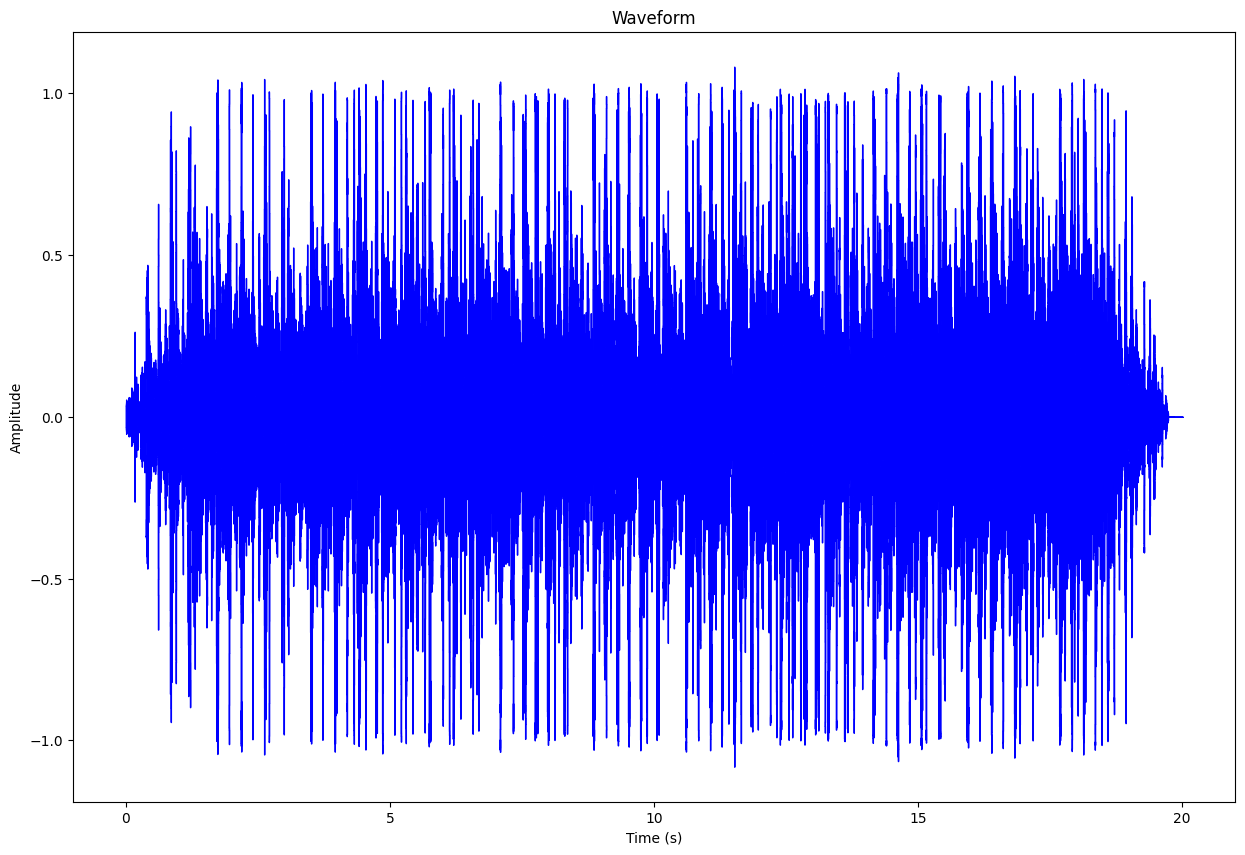

In [12]:
# 오디오 파일이 잘 불러와지는지 확인
# 부록 참조

filedir = "split_wav/1.wav"

y, sr = librosa.load(filedir, sr = 22050)
# sr : sampling rate (자르는 주기와 관련)

print(y, y.shape)

plt.figure(figsize = FIG_SIZE)
librosa.display.waveshow(y, sr=sr, color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

## 4. 데이터 가공과 분석

- 푸리에 변환(Fourier transform)이란?

푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기함수들의 합으로 분해하여 표현하는 것이다.

![image_01](image_01.png)
https://en.wikipedia.org/wiki/Fourier_transform

하지만 푸리에 변환은 신호가 어떤 주파수 성분을 갖는지만 확인할 수 있고, 어느 시각에 해당 주파수 성분이 존재하는지는 알 수 없다. 따라서 시간 정보에 대한 손실이 나는 단점이 있다.

- STFT(Short Time Fourier Transform)

기존 푸리에 변환의 시간 정보 손실 단점을 해결하기 위해 고안되었다. 신호를 매우 짧은 시간 범위로 쪼갠 후 각각의 범위에서 푸리에 변환을 실시한다. 이러한 방식으로 푸리에 변환에 시간의 흐름을 더해줄 수 있다.

파이썬의 librosa를 사용하면 수학적인 구현을 직접 할 필요 없이 푸리에 변환을 바로 사용할 수 있다.

다음 코드는 musiclist에 있는 모든 음악들을 STFT변환하여 스펙트로그램을 그리는 코드이다. 이는 stft_result 폴더에 저장된다.

In [14]:
# STFT to spectrogram

try:
    os.mkdir("stft_result")
    filedir = "split_wav/"

    for n in range(1, 98):
        y, sr = librosa.load(filedir + str(n) + ".wav", sr = 22050)
        hop_length = 512
        n_fft = 2048

        # STFT 적용
        stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

        # 복소공간 값 절댓값 취하기
        magnitude = np.abs(stft)

        # amplitude -> 데시벨 변환
        log_spectrogram = librosa.amplitude_to_db(magnitude)

        # 스펙트로그램
        fig = plt.figure(figsize=FIG_SIZE)
        plt.figure(figsize=FIG_SIZE)
        librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
        plt.xlabel("Time")
        plt.ylabel("Frequency")
        plt.colorbar(format="%+2.0f dB")
        plt.title("Spectrogram (dB)")
        plt.savefig("stft_result/" + str(n) + ".png")
        plt.close(fig)
except:
    print("폴더가 이미 존재합니다. 삭제 후 실행해주세요")

폴더가 이미 존재합니다. 삭제 후 실행해주세요


- librosa.stft 함수

![image_02](image_02.png)
https://kr.mathworks.com/help/dsp/ref/dsp.stft.html

이 함수는 파라미터로 win_length / hop_length / n_fft를 받는다.

1. win_length는 window 길이로써 신호를 쪼개는 단위 파라미터이다.

2. hop_length는 얼마만큼 간격을 두면서 신호를 쪼갤 것인지에 대한 파라미터이다.

3. n_fft는 쪼개진 신호의 해상도를 위해 얼마나 더 zero-padding할 것인지에 대한 파라미터이다.

여기서 win_length는 함수 기본값을 사용하였다.

### 가설 분석 1

- Bass 음악의 subgenre들은 대체로 저음역대가 강조되는 경향을 띌 것이다.

49번부터 63번까지 Bass 장르의 음악이다. 49번부터 63번까지 스펙트로그램 값을 모두 더한 결과의 평균과 나머지 음악을 모두 더한 결과의 평균을 비교했다.

[[  23.57442864  -67.73064756 -214.15188253 ...    0.
     0.            0.        ]
 [  34.76699263  -36.73669603 -138.81196541 ...    0.
     0.            0.        ]
 [  70.80630183   21.6516946   -88.75498916 ...    0.
     0.            0.        ]
 ...
 [-425.03606033 -425.03606033 -425.03606033 ...    0.
     0.            0.        ]
 [-425.03606033 -425.03606033 -425.03606033 ...    0.
     0.            0.        ]
 [-425.03606033 -425.03606033 -425.03606033 ...    0.
     0.            0.        ]]
[[  1.68388776  -4.8379034  -15.29656304 ...   0.           0.
    0.        ]
 [  2.48335662  -2.62404972  -9.91514039 ...   0.           0.
    0.        ]
 [  5.05759299   1.54654961  -6.33964208 ...   0.           0.
    0.        ]
 ...
 [-30.3597186  -30.3597186  -30.3597186  ...   0.           0.
    0.        ]
 [-30.3597186  -30.3597186  -30.3597186  ...   0.           0.
    0.        ]
 [-30.3597186  -30.3597186  -30.3597186  ...   0.           0.
    0.        ]]


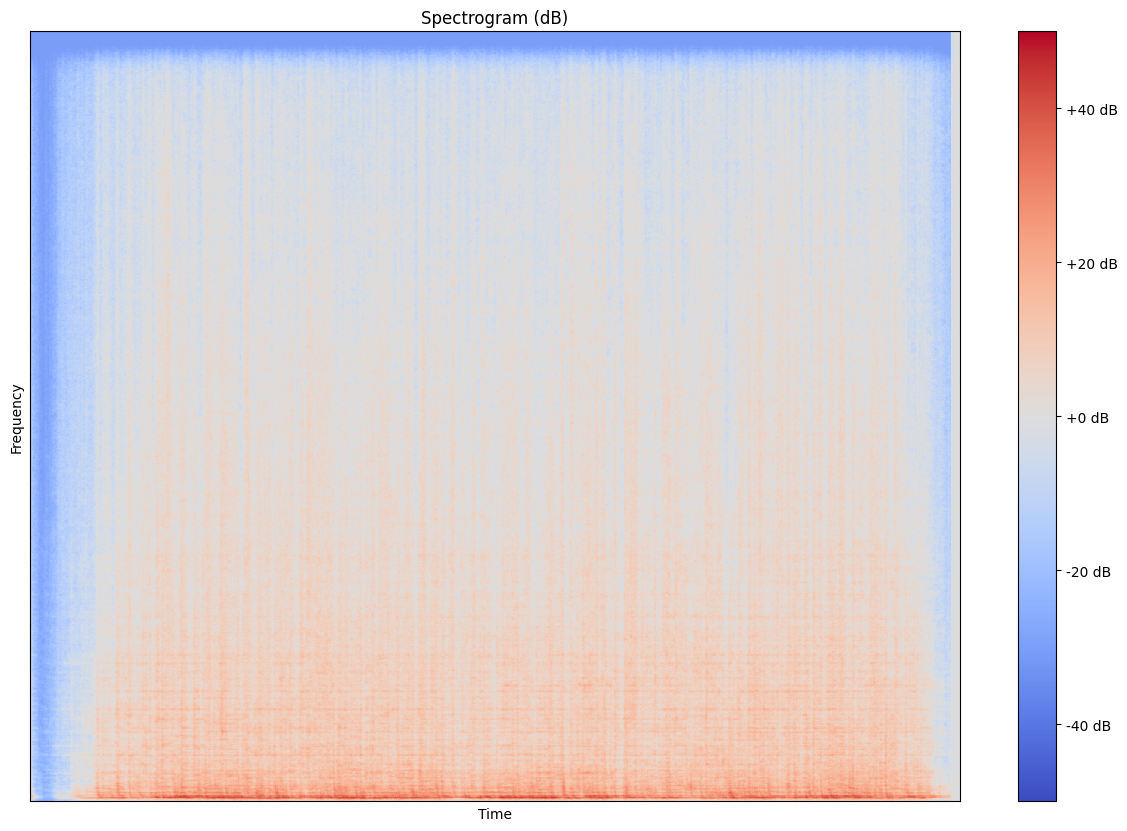

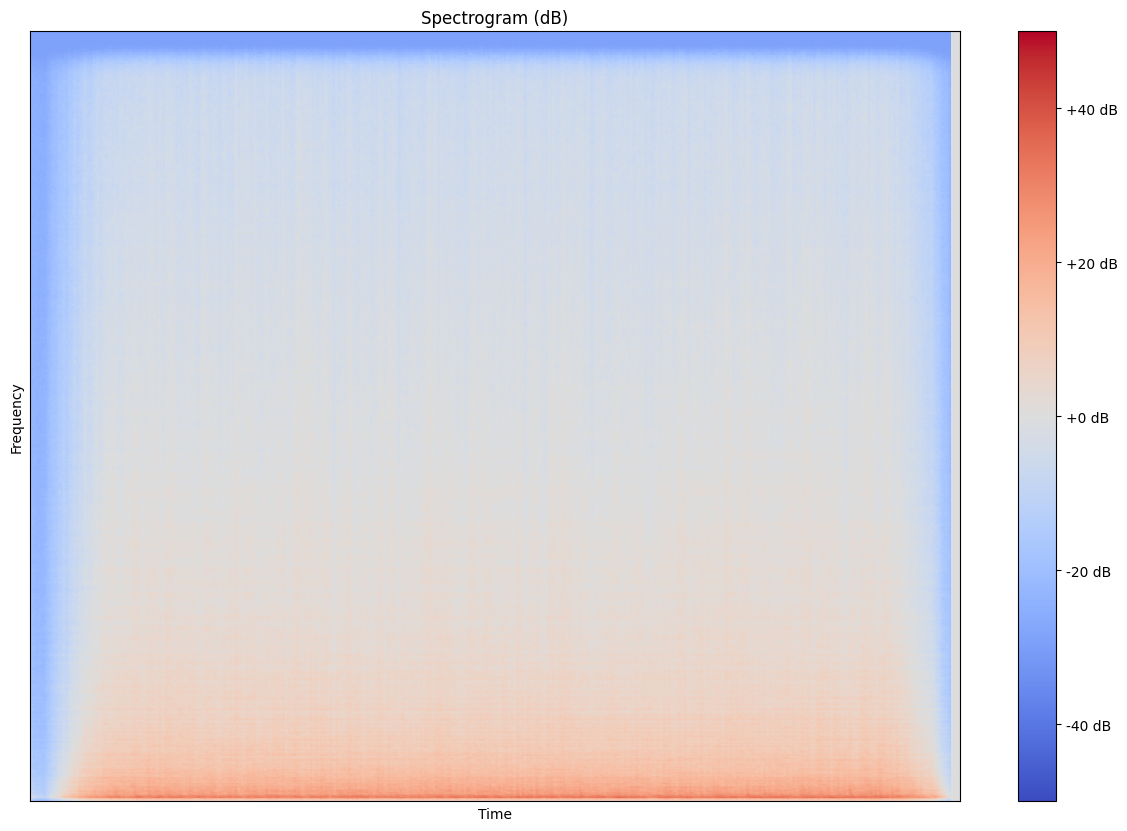

In [65]:
try:
    os.mkdir('hypo_1')
    filedir = "split_wav/"

    tmp = np.zeros((1025, 870))
    etc = np.zeros((1025, 870))

    for n in range(1, 98):
        y, sr = librosa.load(filedir + str(n) + ".wav", sr = 22050)
        hop_length = 512
        n_fft = 2048
        stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
        magnitude = np.abs(stft)
        log_spectrogram = librosa.amplitude_to_db(magnitude)
        l = log_spectrogram.shape
        new_col = np.zeros((1025, 1))
        k = tmp.shape[1] - l[1]
        
        if n >= 49 and n < 64:
            if l != tmp.shape:
                for i in range(k):
                    log_spectrogram = np.append(log_spectrogram, new_col, axis=1)
            tmp = tmp + log_spectrogram
        else:
            if l != etc.shape:
                for i in range(k):
                    log_spectrogram = np.append(log_spectrogram, new_col, axis=1)
            etc = etc + log_spectrogram

    print(tmp)
    tmp = tmp / 14
    print(tmp)
    etc = etc / 83

    fig = plt.figure(figsize=FIG_SIZE)
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(tmp, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format="%+2.0f dB")
    plt.clim(-50, 50)
    plt.title("Spectrogram (dB)")
    plt.savefig("hypo_1/bass.png")
    plt.close(fig)

    fig = plt.figure(figsize=FIG_SIZE)
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(etc, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format="%+2.0f dB")
    plt.clim(-50, 50)
    plt.title("Spectrogram (dB)")
    plt.savefig("hypo_1/etc.png")
    plt.close(fig)
except:
    print("폴더가 이미 존재합니다. 삭제 후 실행해주세요")

Bass 장르의 음악이 다른 장르에 비해 베이스 음량이 높은지는 확인하기 힘들었다.

### 가설 분석 2

- 강렬한 사운드가 포함된 음악은 주파수 변화로 스펙트로그램에 드러날 것이다.

신스 사운드가 강렬한 음악 63번과 스트링 사운드가 강렬한 음악 94번의 스펙트로그램을 관찰하고 이 특성이 스펙트로그램에 반영되었는지 확인한다.

![63.png](stft_result/63.png)

- 63번은 강렬한 신스 플럭(pluck) 사운드가 인상적인 곡이다. 플럭 사운드의 높낮이에 따라 스펙트로그램에 주파수 대역으로 그대로 표현되었다.

![94.png](stft_result/94.png)

- 94번은 7초 부근에서 매우 강렬하게 찢는 스트링(string) 사운드가 인상적인 곡이다. 사운드가 유지되는 동안 스펙트로그램에 주파수 대역으로 그대로 표현되었다.

### 가설 분석 3
- Chill 음악과 Hard 음악을 비교했을 때 상대적으로 Hard 음악이 전체적인 주파수 대역에서 높은 dB값을 가질 것이다.

Chill 음악은 80번부터 89번까지이고, Hard 음악은 64번부터 76번까지이다.

[[ -52.13279355 -113.26335722 -149.71488998 ...    0.
     0.            0.        ]
 [ -46.21286607  -90.26643562 -126.97929153 ...    0.
     0.            0.        ]
 [ -29.59822336 -114.75574726 -119.51042935 ...    0.
     0.            0.        ]
 ...
 [-390.840168   -390.840168   -390.840168   ...    0.
     0.            0.        ]
 [-390.840168   -390.840168   -390.840168   ...    0.
     0.            0.        ]
 [-390.840168   -390.840168   -390.840168   ...    0.
     0.            0.        ]]
[[ -4.01021489  -8.71256594 -11.51653    ...   0.           0.
    0.        ]
 [ -3.55483585  -6.94357197  -9.76763781 ...   0.           0.
    0.        ]
 [ -2.27678641  -8.82736517  -9.19310995 ...   0.           0.
    0.        ]
 ...
 [-30.06462831 -30.06462831 -30.06462831 ...   0.           0.
    0.        ]
 [-30.06462831 -30.06462831 -30.06462831 ...   0.           0.
    0.        ]
 [-30.06462831 -30.06462831 -30.06462831 ...   0.           0.
    0.        ]]


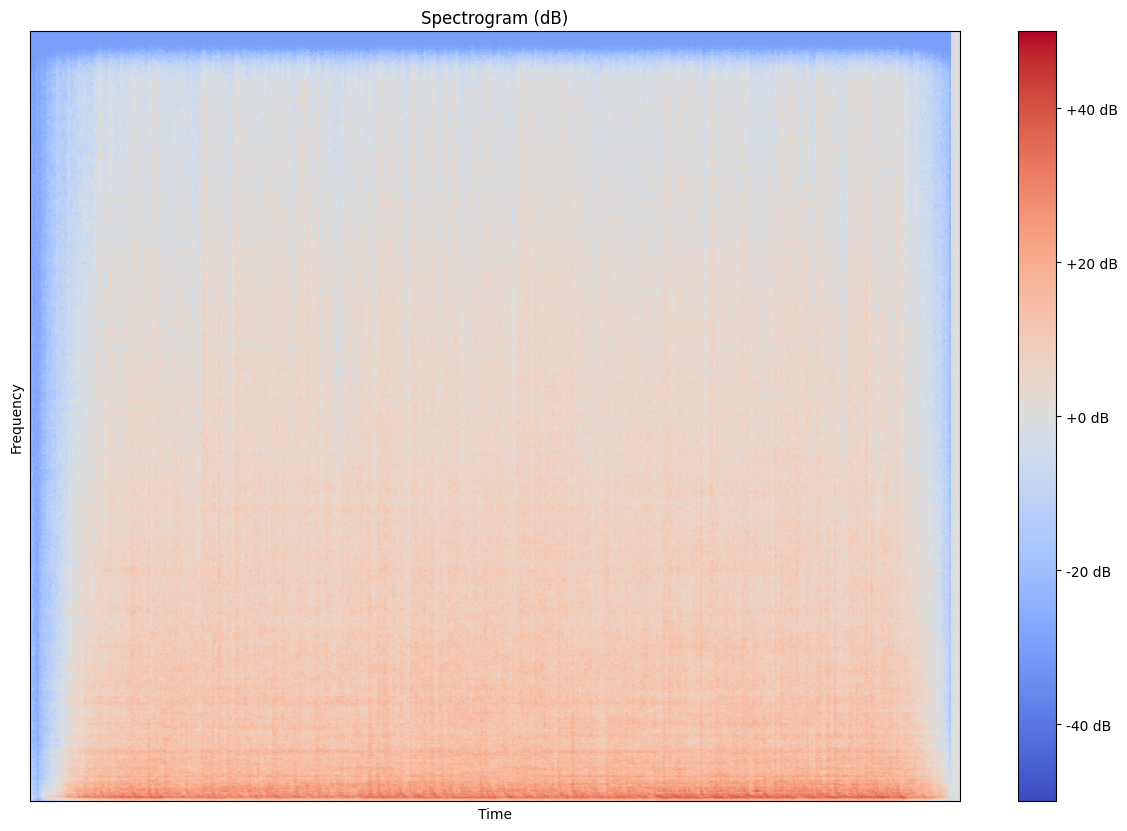

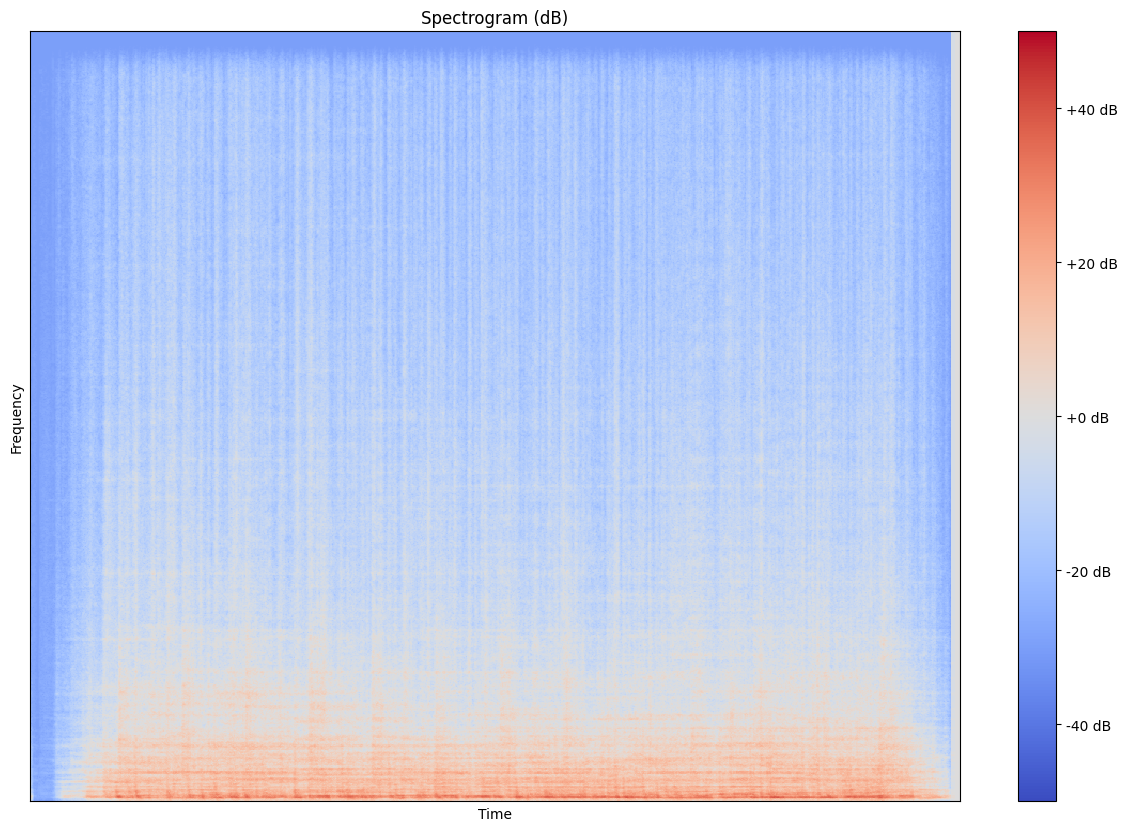

In [68]:
try:
    os.mkdir('hypo_3')
    filedir = "split_wav/"

    tmp = np.zeros((1025, 870))
    etc = np.zeros((1025, 870))

    for n in range(64, 90):
        y, sr = librosa.load(filedir + str(n) + ".wav", sr = 22050)
        hop_length = 512
        n_fft = 2048
        stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
        magnitude = np.abs(stft)
        log_spectrogram = librosa.amplitude_to_db(magnitude)
        l = log_spectrogram.shape
        new_col = np.zeros((1025, 1))
        k = tmp.shape[1] - l[1]
        
        if n >= 64 and n < 77:
            if l != tmp.shape:
                for i in range(k):
                    log_spectrogram = np.append(log_spectrogram, new_col, axis=1)
            tmp = tmp + log_spectrogram
        elif n >= 80 and n < 90:
            if l != etc.shape:
                for i in range(k):
                    log_spectrogram = np.append(log_spectrogram, new_col, axis=1)
            etc = etc + log_spectrogram

    print(tmp)
    tmp = tmp / 13
    print(tmp)
    etc = etc / 10

    fig = plt.figure(figsize=FIG_SIZE)
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(tmp, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format="%+2.0f dB")
    plt.clim(-50, 50)
    plt.title("Spectrogram (dB)")
    plt.savefig("hypo_3/hard.png")
    plt.close(fig)

    fig = plt.figure(figsize=FIG_SIZE)
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(etc, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format="%+2.0f dB")
    plt.clim(-50, 50)
    plt.title("Spectrogram (dB)")
    plt.savefig("hypo_3/chill.png")
    plt.close(fig)
except:
    print("폴더가 이미 존재합니다. 삭제 후 실행해주세요")

Hard 장르의 음악이 Chill 장르의 음악보다 거의 모든 주파수 영역에서 더 높은 dB값을 갖는다. (음압이 높다)

## 5. 결론

가설 검증 과정을 통해 얻을 수 있었던 것은 다음과 같다.
1. Bass 장르라고 해서 베이스 음량이 다른 장르에 비해 큰 것은 아니다.
2. 특이한 사운드나 강렬한 사운드가 포함된 음악일 경우 이와 같은 특성이 스펙트로그램에 나타난다.
3. Hard 장르는 Chill 장르보다 음압이 높다.

스펙트로그램 분석을 통해 비슷한 장르끼리의 주파수 영역에 대한 파악과 강렬한 사운드가 들어간 음악을 찾아내는 것이 가능했다. 이를 바탕으로 음악의 특징에 따라 사용자의 취향에 맞는 곡을 제공하는 것이 가능함을 알 수 있었다.

## 6. 부록

- 음악 목록은 musiclist.txt에 기록해 두었다.

- 모든 오디오 파일에 대한 파형은 waveform 폴더에 저장되어 있다. 아래 코드 참조.

In [4]:
try:
    os.mkdir("waveform")
    filedir = "split_wav/"
    
    for n in range(1, 98):
        y, sr = librosa.load(filedir + str(n) + ".wav", sr = 22050)

        fig = plt.figure(figsize=FIG_SIZE)
        librosa.display.waveshow(y, sr=sr, color="blue")
        
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title("Waveform")
        plt.savefig("waveform/" + str(n) + ".png")
        plt.close(fig)
except:
    print("폴더가 이미 존재합니다. 삭제 후 실행해주세요")

폴더가 이미 존재합니다. 삭제 후 실행해주세요
